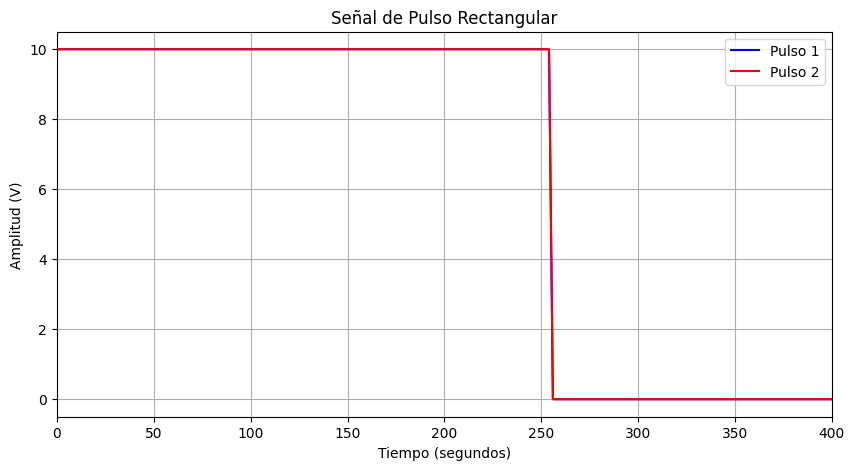

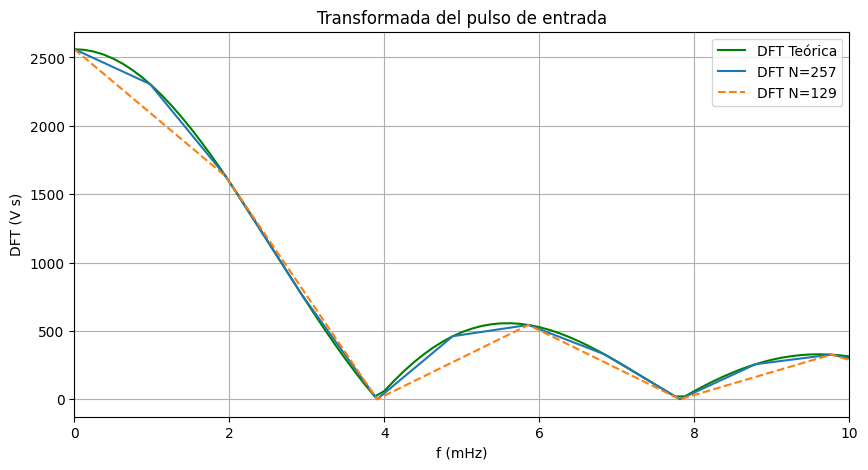

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

def dft(vs, dt):
    ns = len(vs)
    ks = np.arange(ns)
    ns_coef = np.arange(ns)
    vsdf = np.zeros(ns, dtype=complex)
    
    for k in ks:
        vsdf[k] = np.sum(vs * np.exp(-1j * 2 * np.pi * ns_coef * k / ns) * dt)
    
    return vsdf

def idft(vsdf, dt):
    ns = len(vsdf)
    ns_coef = np.arange(ns)
    vs = np.zeros(ns, dtype=complex)
    
    for n in range(ns):
        vs[n] = np.sum(vsdf * np.exp(1j * 2 * np.pi * ns_coef * n / ns)) * dt / ns
    
    return vs

# Función para redondear partes reales e imaginarias cercanas a cero
def redondear_cercanas_a_cero(arr, tolerancia=1e-10):
    arr_real = np.real(arr)
    arr_imag = np.imag(arr)
    arr_real[np.abs(arr_real) < tolerancia] = 0
    arr_imag[np.abs(arr_imag) < tolerancia] = 0
    return arr_real + 1j * arr_imag

#DEFINIMOS PARAMETROS INICIALES DEL PROBLEMA, YA SEA POR CONSOLA O SE LOS PEDIMOS ##########
v0 = 10  # Amplitud del pulso en voltios
ts = 256  # Anchura del pulso en segundos
tmax1 = 1024  # Duración total de las señales en segundos
tmax2 = 512
dt = 2 #Intervalo de muestreo

""" def ingresar_valores():
    
    #Función para solicitar al usuario que ingrese v0, tmax1, tmax2 y tmax3.
    
    v0 = float(input("Ingrese el valor de v0: "))
    tmax1 = float(input("Ingrese el valor de tmax1: "))
    tmax2 = float(input("Ingrese el valor de tmax2: "))
    ts = float(input("Ingrese el valor de ts: "))
    dt = float(input("Ingrese el valor de dt: "))

    return v0, tmax1, tmax2, ts, dt

# Llamada a la función para ingresar los valores y guardarlos en variables
v0, tmax1, tmax2, ts, dt  = ingresar_valores()  """

# Con los parametros anteriores calculamos otros que necesitamos
def calcular_parametros(*args):
    """ 
    - *args: Lista de tmax y dt.
    """
    resultados = []
    
    for tmax, dt in args:
        ntm = int(tmax/dt)
        dftmax = 1/tmax
        nfmtm = int(ntm/2 + 1)
        frtm = np.arange(0, nfmtm) * dftmax
        resultados.append((ntm, dftmax, nfmtm, frtm))
    
    return resultados

resultados = calcular_parametros((tmax1,dt),(tmax2,dt))


#Creamos el pulso rectangular con lo que ya sabemos
def crear_pulso_rectangular(v0, tmax, dt, ts):
    """      
    - tmax: Valor de tmax.
    - dt: Incremento de tiempo.
    - ts: Duración del pulso rectangular.
    - v0: Valor del pulso rectangular.   
    
    """
    tiempo = np.arange(0, tmax, dt)
    pulso_rectangular = np.zeros_like(tiempo)
    pulso_rectangular[(tiempo >= 0) & (tiempo < ts)] = v0
    
    return tiempo, pulso_rectangular

tiempo1, pulso_rectangular1=crear_pulso_rectangular(v0,tmax1,dt,ts)
tiempo2, pulso_rectangular2=crear_pulso_rectangular(v0,tmax2,dt,ts)

#Graficamos los pulsos rectangulares
def graficar_pulso_rectangular(*args):
    """
    Grafica señales de pulso rectangular en función del tiempo.

    - *args Lista de tuplas de la forma (tiempo, pulso_rectangular, color, etiqueta).
    """
    plt.figure(figsize=(10, 5))

    for tiempo, pulso_rectangular, color, etiqueta in args:
        plt.plot(tiempo, pulso_rectangular, color=color, label=etiqueta)

    plt.xlim(0,400)
    plt.title('Señal de Pulso Rectangular')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

#Usamos la función definida para graficar (Llamada a la función)
graficar_pulso_rectangular((tiempo1,pulso_rectangular1,'blue', 'Pulso 1'),(tiempo2,pulso_rectangular2,'red', 'Pulso 2'))


#Empezamos con las transformadas
#Pulso teórico por la definición de transformada
def transf_teorica_pulso(f,v0,ts):
    vt=v0*ts*np.exp(-2.*np.pi*1j*f*ts/2.)*np.sinc(2.*f*ts/2.)
    return vt

frecsteo=np.linspace(0,1/(2.*dt),2000)     # frecuencias 0 - fmax
Tteo_pulso=transf_teorica_pulso(frecsteo,v0,ts)

#transformada usando el algoritmo
Tvetm1=dft(pulso_rectangular1,dt)   # Transformada con todas las muestras del pulso
Tvetm2=dft(pulso_rectangular2,dt)

#Creación de una función genérica que plote un numero de señales arbitrario siendo la primera la señal teórica
def graficar_general_N_module(frecsteo, Tteo_pulso, *args):
    """
    Grafica la transformada de Fourier de un pulso de entrada y sus DFTs con respecto a la frecuencia.   
    - frecsteo  Frecuencia de muestreo.
    - Tteo_pulso  Transformada de Fourier teórica del pulso de entrada.
    - *args  Lista de tuplas de la forma (frtm, Tvetm, nfmt)

    """
    plt.figure(figsize=(10, 5))
    plt.plot(frecsteo*1E3, abs(Tteo_pulso), c='g', label='DFT Teórica')

    for i, (frtm, Tvetm, nfmt) in enumerate(args):
        plt.plot(frtm*1E3, np.abs(Tvetm[0:nfmt]), label=f'DFT N={nfmt}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlim(0, 10)
    plt.xlabel('f (mHz)')
    plt.ylabel('DFT (V s)')
    plt.legend(loc=1)
    plt.grid()
    plt.title('Transformada del pulso de entrada')
    plt.show()

graficar_general_N_module(frecsteo, Tteo_pulso, (resultados[0][3], Tvetm1, resultados[0][2]), (resultados[1][3], Tvetm2, resultados[1][2]))
#EL valor de resultados es una matrix, o una lista de tuplas, es decir, tenemos la primera tupla que es para tmax1 con sus 3 caracteristicas
# y la segunda, así para acceder a la primera tupla tenemos el indice 0, y sus correspondientes valores de los vectores 0,1,2 y 3

# Tarea 2

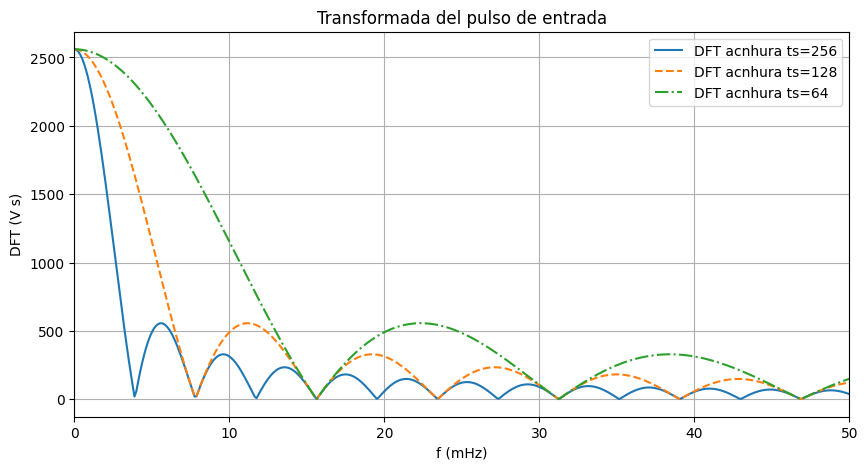

In [2]:
#Transformada para el pulso con 128 segundo de ancho
ts2=128
ts3=64
Tteo_pulso2=transf_teorica_pulso(frecsteo,v0*2,ts2)
Tteo_pulso3=transf_teorica_pulso(frecsteo,v0*4,ts3)

def graficar_transformada_teorica(*args):

    plt.figure(figsize=(10, 5))

    for i, (frecsteo, Tteo_pulso, ts) in enumerate(args):
        plt.plot(frecsteo*1E3, np.abs(Tteo_pulso),label=f'DFT acnhura ts={ts}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlim(0, 50)
    plt.xlabel('f (mHz)')
    plt.ylabel('DFT (V s)')
    plt.legend(loc=1)
    plt.grid()
    plt.title('Transformada del pulso de entrada')
    plt.show()


graficar_transformada_teorica((frecsteo,Tteo_pulso,ts),(frecsteo,Tteo_pulso2,ts2),(frecsteo,Tteo_pulso3,ts3))

# Tarea 3



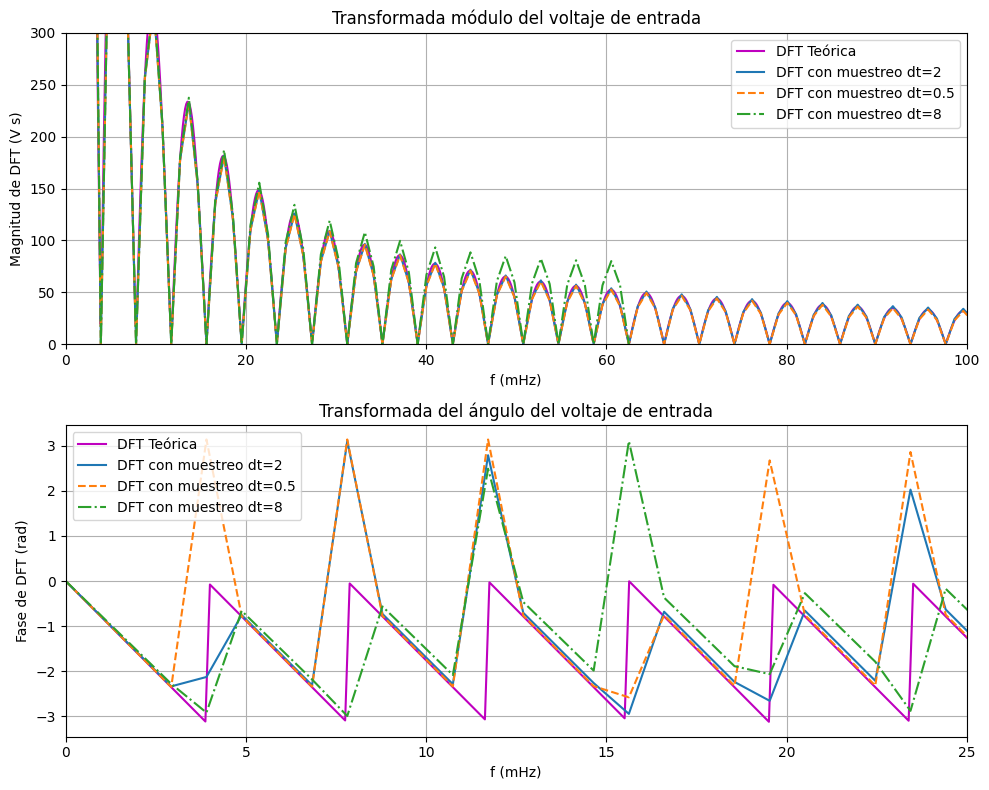

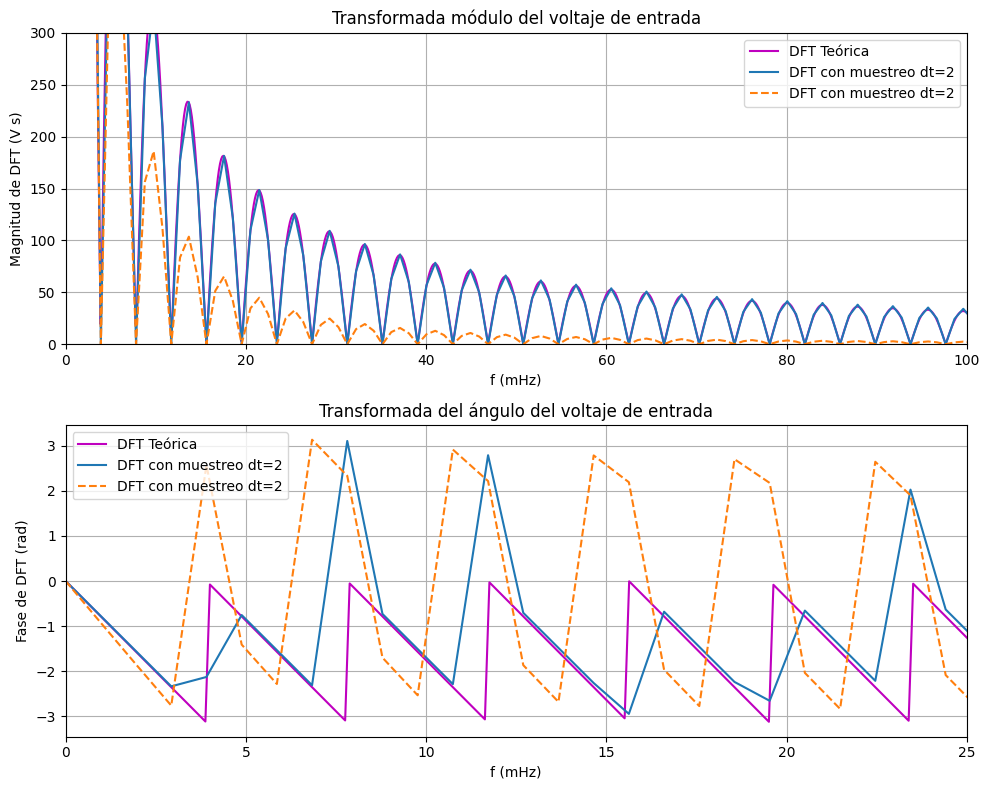

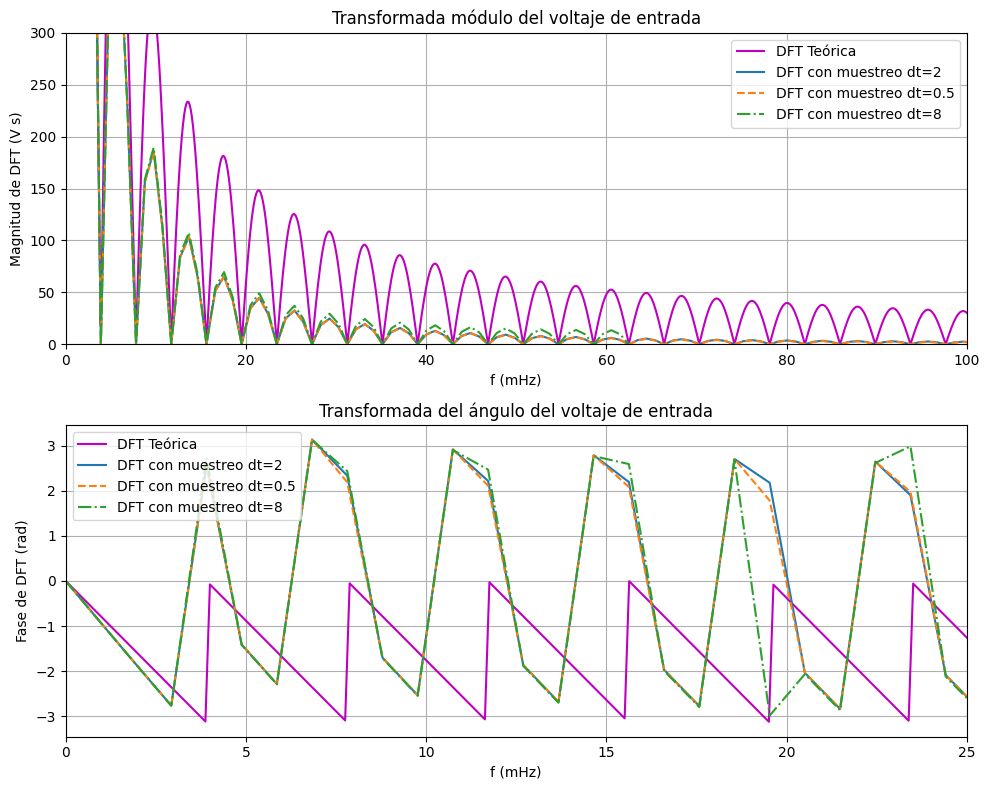

In [3]:
dt1 = 2
dt2 = 0.5
dt3 = 8
resultados = calcular_parametros((tmax1,dt1),(tmax1,dt2),(tmax1,dt3))

tiempo1, pulso_rectangular1 = crear_pulso_rectangular(v0, tmax1, dt1, ts)
tiempo2, pulso_rectangular2 = crear_pulso_rectangular(v0, tmax1, dt2, ts)
tiempo3, pulso_rectangular3 = crear_pulso_rectangular(v0, tmax1, dt3, ts)

Tvetm1 = dft(pulso_rectangular1,dt1)
Tvetm2 = dft(pulso_rectangular2,dt2)
Tvetm3 = dft(pulso_rectangular3,dt3)

#DEFINIMOS UNA FUNCIÓN MUY PARECIDA A LA QUE SE DEFINIIO EN LA TAREA 1 PERO CON UNA FUNCIONALIDAD NUEVA, las graficas quedan mas bonitas y plotean el moudlo y el argumento
def graficar_general_N_mod_fase(Tteo_pulso, frecsteo, *args):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    # Primero: Magnitud de la DFT
    axs[0].plot(frecsteo*1E3, np.abs(Tteo_pulso), c='m', label='DFT Teórica')
    for i, (frdt,Tvetm, nfmt, dt) in enumerate(args):
        axs[0].plot(frdt*1E3, np.abs(Tvetm[0:nfmt]), label=f'DFT con muestreo dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    axs[0].set_xlim(0, 100)
    axs[0].set_ylim(0, 300)
    axs[0].set_xlabel('f (mHz)')
    axs[0].set_ylabel('Magnitud de DFT (V s)')
    axs[0].legend(loc=1)
    axs[0].grid()
    axs[0].set_title('Transformada módulo del voltaje de entrada')

    # Segundo: Fase de la DFT
    axs[1].plot(frecsteo*1E3, np.angle(Tteo_pulso), c='m', label='DFT Teórica')
    for i, (frdt,Tvetm, nfmt, dt) in enumerate(args):
        axs[1].plot(frdt*1E3, np.angle(Tvetm[0:nfmt]), label=f'DFT con muestreo dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    axs[1].set_xlim(0, 25)
    axs[1].set_xlabel('f (mHz)')
    axs[1].set_ylabel('Fase de DFT (rad)')
    axs[1].legend(loc=2)
    axs[1].grid()
    axs[1].set_title('Transformada del ángulo del voltaje de entrada')

    plt.tight_layout()
    plt.show()

#Para llamar a esta funcion hace falta primero llamar a la teórica y luego al numero arbitrario de transfornmadas que qureamos, en forma de lista, y especificando la transformada,
#las frecuencias y el entorno a que graficamos y el periodo de muestreo
graficar_general_N_mod_fase(Tteo_pulso,frecsteo,(resultados[0][3], Tvetm1, resultados[0][2], dt1),(resultados[1][3], Tvetm2, resultados[1][2], dt2),(resultados[2][3], Tvetm3, resultados[2][2], dt3))

# Voltaje teórico del condensador en el proceso de carga y descarga
def vc(tis,v0,ts,tau):
    val=np.empty(len(tis))
    for i,ti in enumerate(tis):
        if(ti<=ts and ti>=0):
            val[i]=v0*(1-np.exp(-ti/tau))
        else:
            val[i]=v0*(np.exp(ts/tau)-1)*np.exp(-ti/tau)
    return val

r=50E3
c=470E-6
tau=r*c

vcdt1=vc(tiempo1,v0,ts,tau)
vcdt2=vc(tiempo2,v0,ts,tau)
vcdt3=vc(tiempo3,v0,ts,tau)

Tvcdt1 = dft(vcdt1,dt1)
Tvcdt2 = dft(vcdt2,dt2)
Tvcdt3 = dft(vcdt3,dt3)

graficar_general_N_mod_fase(Tteo_pulso,frecsteo,(resultados[0][3],Tvetm1,resultados[0][2], dt1),(resultados[0][3],Tvcdt1,resultados[0][2], dt1))
graficar_general_N_mod_fase(Tteo_pulso,frecsteo,(resultados[0][3],Tvcdt1,resultados[0][2], dt1),(resultados[1][3],Tvcdt2,resultados[1][2], dt2),(resultados[2][3],Tvcdt3,resultados[2][2], dt3))



# Tarea 4


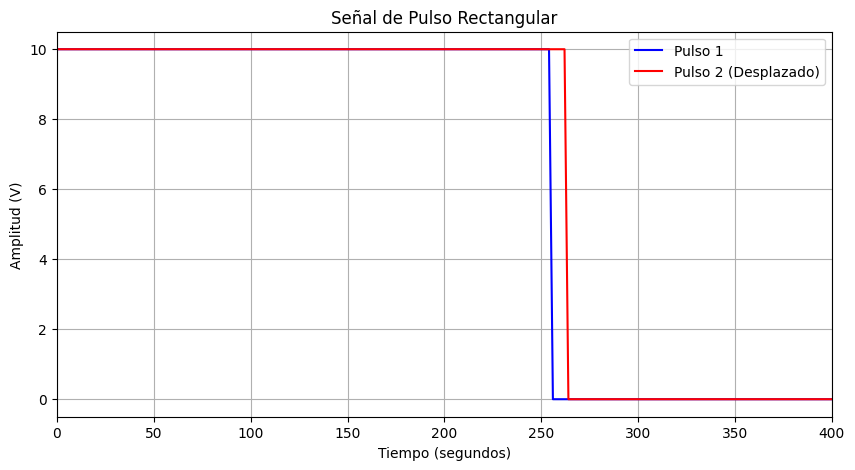

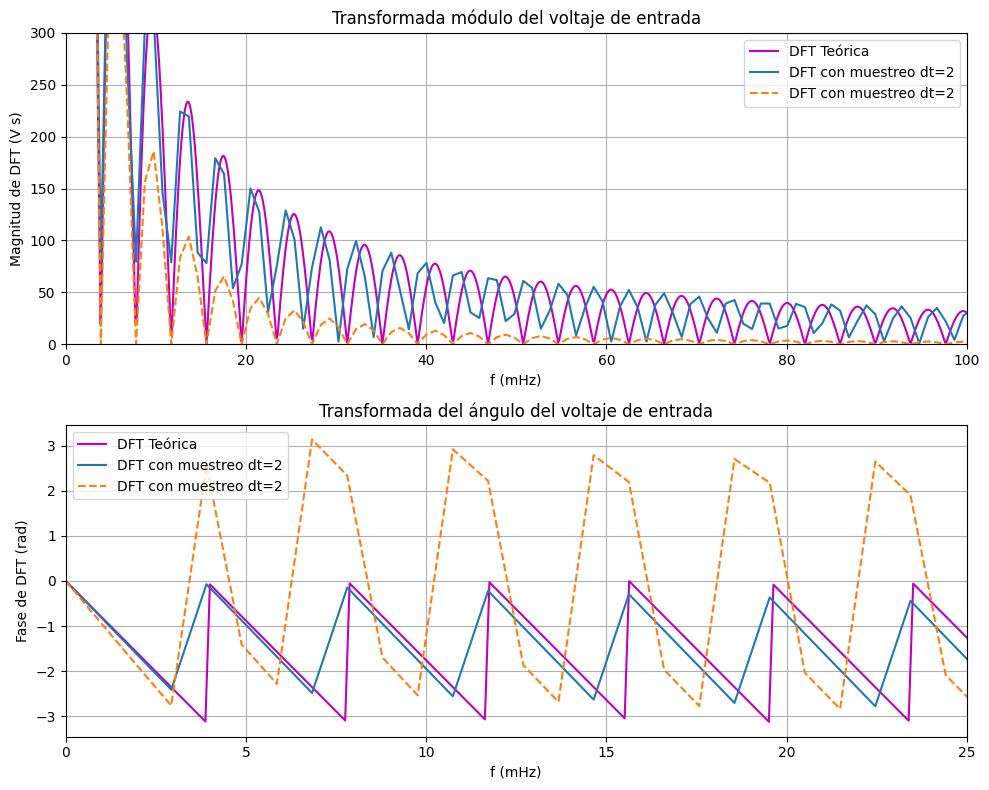

In [4]:
ntsdt3=int(ts/dt3)
ts_a=(int(ntsdt3+1))*dt3

tiempo_a, pulso_rectangular3a= crear_pulso_rectangular(v0, tmax1, dt, ts_a)
Tvedt_a =dft(pulso_rectangular3a,dt)

graficar_pulso_rectangular((tiempo1,pulso_rectangular1,'blue', 'Pulso 1'),(tiempo_a,pulso_rectangular3a,'red', 'Pulso 2 (Desplazado)'))

graficar_general_N_mod_fase(Tteo_pulso,frecsteo,(resultados[0][3], Tvedt_a, resultados[0][2], dt1),(resultados[0][3],Tvcdt1,resultados[0][2], dt1))



# Tarea 5

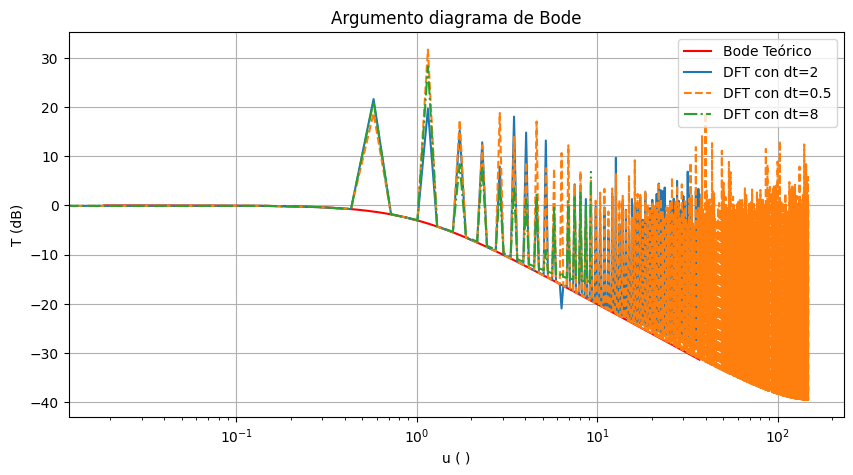

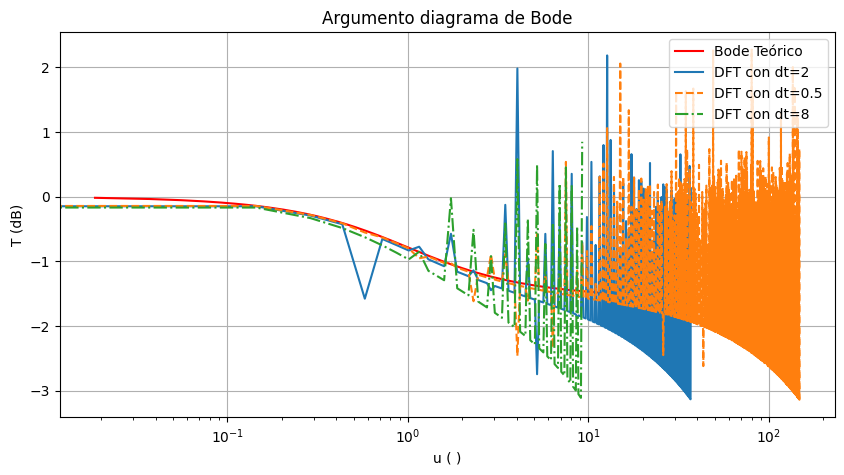

In [5]:
def ftra(u):
    return 1/(1+1j*u)

fc=1/(2*pi*tau)

usteo=(frecsteo)/fc #Normalizamos las frecuencias teóricas 
ftrateo=ftra(usteo) #Creamos la función de transferencia con el especto de frecuencias normalizada
ftrateodb=20*np.log10(abs(ftrateo)) #Diagrama de Bode
ftrateofa=np.angle(ftrateo)

def calcular_ftradt(*args):
    """ 
    - *args: Lista de Tvcdt,Tvetm.
    """
    func_transf = []
    
    for Tvcdt, Tvetm in args:
        ftradt=Tvcdt/Tvetm
        ftradtdb=20*np.log10(abs(ftradt))
        ftradtfa=np.angle(ftradt)        
        func_transf.append((ftradtdb, ftradtfa))
    
    return func_transf

func_transf = calcular_ftradt((Tvcdt1,Tvetm1),(Tvcdt2,Tvetm2),(Tvcdt3,Tvetm3))

#Las transformadas que se han obtenido por muestreo, hacemos su func de transferencia: ES LO QUE HAY ARRIBA
""" ftradt1=Tvcdt1/Tvetm1
ftradt1db=20*np.log10(abs(ftradt1))
ftradt1fa=np.angle(ftradt1)

ftradt2=Tvcdt2/Tvetm2
ftradt2db=20*np.log10(abs(ftradt2))
ftradt2fa=np.angle(ftradt2)

ftradt3=Tvcdt3/Tvetm3
ftradt3db=20*np.log10(abs(ftradt3))
ftradt3fa=np.angle(ftradt3) """

usdt1=(resultados[0][3])/fc ##ESTO DE RESULTADOS [0,1,2][3] ESTARIA BIEN HACER UNA FUNCIÓN QUE RECUPERE LOS VALORES DE CALCULAR PARAMETROS DE UNA MENRA MAS LIMPIA, P.EJ: frecuencias=(resultados[i][3]), numeros[j][2] y etc
usdt2=(resultados[1][3])/fc
usdt3=(resultados[2][3])/fc

nfmdt1=resultados[0][2] #Recuperamos los valores, lo podriamos haber hecho mas arriba la verdad
nfmdt2=resultados[1][2]
nfmdt3=resultados[2][2]

def graficar_Bode_teo(usteo, Tteo_pulso, *args):

    plt.figure(figsize=(10, 5))
    
    if Tteo_pulso == 'ftrateodb':
        plt.semilogx(usteo[1:], ftrateodb[1:], c='r', label='Bode Teórico')
    elif Tteo_pulso == 'ftrateofa':        
        plt.semilogx(usteo[1:], ftrateofa[1:], c='r', label='Bode Teórico')
    else:
        raise ValueError("El parámetro 'Tteo_pulso' debe ser 'ftrateodb' o 'ftrateofa'")
   
    
    for i, (usdt, ftradtdb, nfmdt, dt) in enumerate(args):
        plt.semilogx(usdt, (ftradtdb[0:nfmdt]), label=f'DFT con dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlabel('u ( )')
    plt.ylabel('T (dB)')
    plt.legend(loc=1)
    plt.grid()
    plt.title('Argumento diagrama de Bode')
    plt.show()

graficar_Bode_teo(usteo, 'ftrateodb', (usdt1, func_transf[0][0],nfmdt1, dt1),(usdt2, func_transf[1][0],nfmdt2,dt2),(usdt3, func_transf[2][0],nfmdt3,dt3))

graficar_Bode_teo(usteo, 'ftrateofa', (usdt1, func_transf[0][1],nfmdt1, dt1),(usdt2, func_transf[1][1],nfmdt2,dt2),(usdt3, func_transf[2][1],nfmdt3,dt3))


# Tarea 5-b

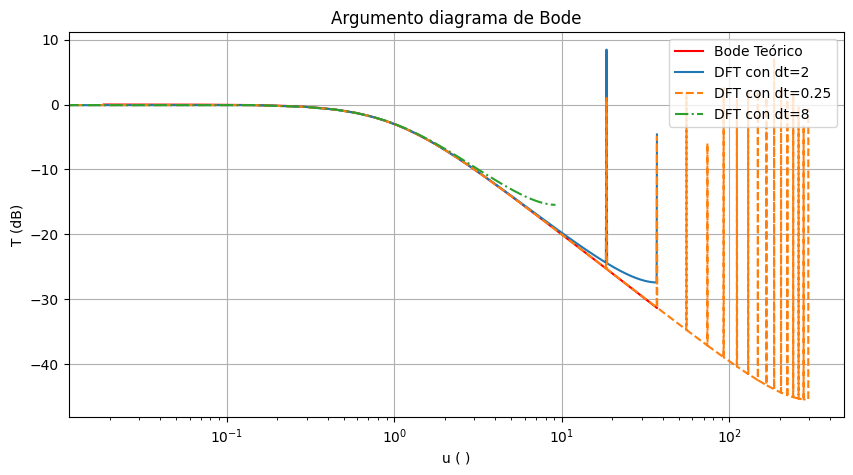

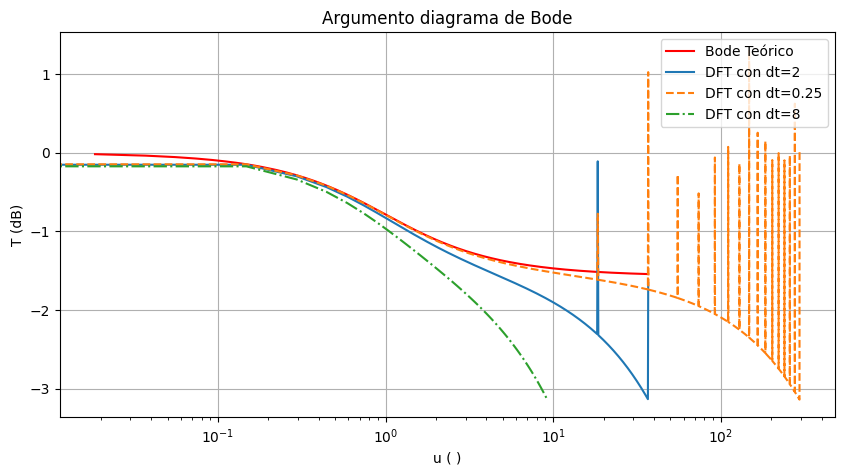

In [6]:
tmax=1000
dt1 = 2
dt2 = 0.25
dt3 = 8

resultados2 = calcular_parametros((tmax,dt1),(tmax,dt2),(tmax,dt3))

tiempodt1, pulso_rectangulardt1=crear_pulso_rectangular(v0,tmax,dt1,ts)
tiempodt2, pulso_rectangulardt2=crear_pulso_rectangular(v0,tmax,dt2,ts)
tiempodt3, pulso_rectangulardt3=crear_pulso_rectangular(v0,tmax,dt3,ts)

Tvetm1=dft(pulso_rectangulardt1,dt1)
Tvetm2=dft(pulso_rectangulardt2,dt2)
Tvetm3=dft(pulso_rectangulardt3,dt3)

vcdt1=vc(tiempodt1,v0,ts,tau)
vcdt2=vc(tiempodt2,v0,ts,tau)
vcdt3=vc(tiempodt3,v0,ts,tau)

Tvcdt1 = dft(vcdt1,dt1)
Tvcdt2 = dft(vcdt2,dt2)
Tvcdt3 = dft(vcdt3,dt3)

func_transf = calcular_ftradt((Tvcdt1,Tvetm1),(Tvcdt2,Tvetm2),(Tvcdt3,Tvetm3))

usdt1=(resultados2[0][3])/fc 
usdt2=(resultados2[1][3])/fc
usdt3=(resultados2[2][3])/fc

nfmdt1=resultados2[0][2] 
nfmdt2=resultados2[1][2]
nfmdt3=resultados2[2][2]

graficar_Bode_teo(usteo, 'ftrateodb', (usdt1, func_transf[0][0],nfmdt1, dt1),(usdt2, func_transf[1][0],nfmdt2,dt2),(usdt3, func_transf[2][0],nfmdt3,dt3))

graficar_Bode_teo(usteo, 'ftrateofa', (usdt1, func_transf[0][1],nfmdt1, dt1),(usdt2, func_transf[1][1],nfmdt2,dt2),(usdt3, func_transf[2][1],nfmdt3,dt3))

